In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### External Data gathering
Here are my external data sources, they are publicly available:
    - http://www.usinflationcalculator.com/inflation/current-inflation-rates/
      I have obtained the month on month inflation rates from here.
    - https://www.reit.com/data-research/reit-indexes/monthly-property-index-values-returns
      This is called Real Estate Investment Trust. It tracks several indices about real estate and it's specific contributing
      factors. I have used the month on month % change in prices from the indices.
      
#### What is a 'Real Estate Investment Trust - REIT'

A REIT is a type of security that invests in real estate through property or mortgages and often trades on major exchanges like a stock. REITs provide investors with an extremely liquid stake in real estate. They receive special tax considerations and typically offer high dividend yields.

REITs, an investment vehicle for real estate that is comparable to a mutual fund, allowing both small and large investors to acquire ownership in real estate ventures, own and in some cases operate commercial properties such as apartment complexes, hospitals, office buildings, timber land, warehouses, hotels and shopping malls.

All REITs must have at least 100 shareholders, no five of whom can hold more than 50% of shares between them. At least 75% of a REIT's assets must be invested in real estate, cash or U.S. Treasurys; 75% of gross income must be derived from real estate.

REITs are required by law to maintain dividend payout ratios of at least 90%, making them a favorite for income-seeking investors. REITs can deduct these dividends and avoid most or all tax liabilities, though investors still pay income tax on the payouts they receive. Many REITs have dividend reinvestment plans (DRIPs​), allowing returns to compound over time.


Source: Real Estate Investment Trust (REIT) http://www.investopedia.com/terms/r/reit.asp#ixzz4vZIsSkR8 
    

In [11]:
year_month = [201601,201602,201603,201604,201605,201606,201607,201608,201609,201610,201611,201612,
         201701,201702,201703,201704,201705,201706,201707,201708,201709]
# Inflation data
inflation_rate = [
     1.4,1.0,0.9,1.1,1.0,1.0,0.8,1.1,1.5,1.6,1.7,2.1,2.5,2.7,2.4,2.2,1.9,1.6,1.7,1.9,2.2]
# Reit indices
equity_residential_index_price = [
    -5.01,-1.62,11.02,-6.42,3.96,2.93,1.93,-4.25,0.68,-2.81,-3.03,6.47,-2.42,5.16,-1.90,2.37,1.56,1.19,1.73,-0.07,-3.01]
equity_apartments_index_price = [
    -5.09,-2.01,11.53,-6.73,3.41,1.94,1.58,-4.42,0.90,-2.97,-2.90,7.13,-3.42,4.86,-1.81,2.26,1.53,1.04,1.84,-0.43,-2.87 ]
equity_healthcare_index_price = [
    -4.69,-2.17,9.62,0.07,1.61,8.69,5.69,-1.65,-2.50,-7.01,-8.67,4.22,0.23,6.02,-0.73,0.26,0.58,2.94,-2.59,-0.62,-3.48 ]
equity_single_family_home_price_index = [
    -9.20,-3.87,12.70,-0.89,13.92,11.37,6.38,-0.32,-2.98,-1.90,1.35,-1.71,6.14,7.93,-1.73,0.65,-1.52,0.40,1.29,1.51,-2.45 ]
equity_manufactured_homes_price_index = [
    -1.99,4.18,4.67,-5.47,5.19,9.50,3.13,-4.70,0.83,-1.75,-7.02,5.22,2.49,6.33,-2.94,4.60,3.73,1.98,1.16,1.60,-4.74 ]
## Mortgage
home_financing_price_index=[
    -4.29,5.19,3.46,1.28,3.96,2.60,1.51,0.21,-1.73,-0.73,1.72,-1.58,1.57,6.29,1.28,3.88,-1.12,0.24,0.81,1.82,-0.57 ]
infrastructure_reit_price_index = [
    -1.51,-1.18,6.67,1.74,2.54,9.40,-0.28,-1.99,-0.23,0.03,-10.92,3.54,-0.55,9.00,3.03,2.83,5.29,-0.38,2.14,7.45,-7.81 ]


indices_and_inflation_data = pd.DataFrame({'year_month':year_month,
                                'inflation_rate':inflation_rate,
                                'equity_residential_index_price':equity_residential_index_price,
                                'equity_apartments_index_price':equity_apartments_index_price,
                                'equity_healthcare_index_price':equity_healthcare_index_price,
                                'equity_single_family_home_price_index':equity_single_family_home_price_index,
                                'equity_manufactured_homes_price_index':equity_manufactured_homes_price_index,           
                                'home_financing_price_index':home_financing_price_index,
                                'infrastructure_reit_price_index':infrastructure_reit_price_index})
# Setting up addressable column names
pricing_column_names = ['equity_residential_index_price','equity_apartments_index_price',
                         'equity_healthcare_index_price', 'equity_single_family_home_price_index',
                         'equity_manufactured_homes_price_index','home_financing_price_index',
                         'infrastructure_reit_price_index']
inflation_rate_column_names = ['inflation_rate']
year_month_column_names = ['year_month']


In [3]:
indices_and_inflation_data.dtypes

equity_apartments_index_price            float64
equity_healthcare_index_price            float64
equity_manufactured_homes_price_index    float64
equity_residential_index_price           float64
equity_single_family_home_price_index    float64
home_financing_price_index               float64
inflation_rate                           float64
infrastructure_reit_price_index          float64
year_month                                 int64
dtype: object

In [4]:
df1 = pd.read_csv("C://Users//ibipul//codes//datasets//Zillow_data//train_2016_v2.csv")
df2 = pd.read_csv("C://Users//ibipul//codes//datasets//Zillow_data/train_2017.csv")

In [6]:
#Convert transaction date to yearmonth format
def yearmonth(x):
    s = x.split('-')
    return int(s[0]+s[1])
    

In [7]:
df1['year_month'] = df1['transactiondate'].apply(lambda x: yearmonth(x))
df2['year_month'] = df2['transactiondate'].apply(lambda x: yearmonth(x))
df1 = df1.append(df2, ignore_index=True)

In [8]:
df = pd.merge(df1,indices_and_inflation_data, on='year_month')

In [9]:
df.dtypes

parcelid                                   int64
logerror                                 float64
transactiondate                           object
year_month                                 int64
equity_apartments_index_price            float64
equity_healthcare_index_price            float64
equity_manufactured_homes_price_index    float64
equity_residential_index_price           float64
equity_single_family_home_price_index    float64
home_financing_price_index               float64
inflation_rate                           float64
infrastructure_reit_price_index          float64
dtype: object

### Correlation among the pricing indices, and inflation data
It makes sense to see how the month on month data on the various % change of indices correlate among eachother

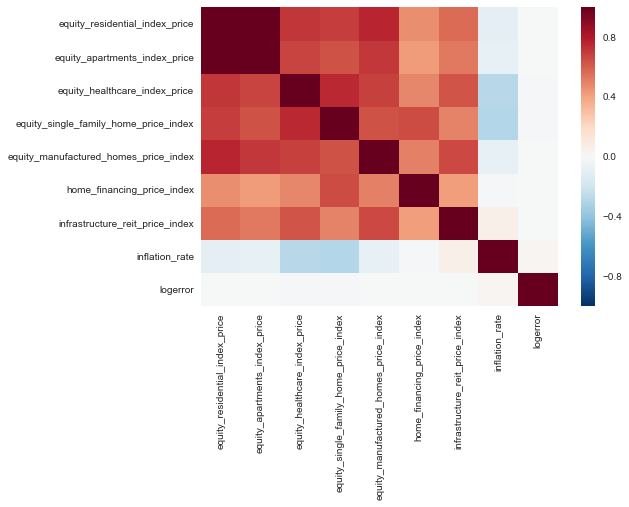

In [58]:
df_corr = df[pricing_column_names+inflation_rate_column_names + ['logerror']].corr()
sns.heatmap(df_corr,xticklabels=df_corr.columns.values,yticklabels=df_corr.columns.values)

It is interesting to see that there is some good correlation among the various index and pricing data that was obtained.
However it is also interesting to note, inflation rate almost 0 to inversely correlated with other indices in the pallatte.

It is however interesting to see that only inflation rates have a very minor correlation with log-error values (0.02). May be inflation rate can be useful when used in presense of the structure tax with some adjustment as well ass other details of the house. I present the correlation matrix below.

In [57]:
df_corr

,equity_residential_index_price,equity_apartments_index_price,equity_healthcare_index_price,equity_single_family_home_price_index,equity_manufactured_homes_price_index,home_financing_price_index,infrastructure_reit_price_index,inflation_rate,logerror
equity_residential_index_price,1.000000,0.995792,0.714445,0.689572,0.759740,0.463852,0.562961,-0.097730,-0.005517
equity_apartments_index_price,0.995792,1.000000,0.677373,0.637571,0.708263,0.423051,0.530243,-0.085656,-0.004997
equity_healthcare_index_price,0.714445,0.677373,1.000000,0.757461,0.687419,0.490959,0.631102,-0.280741,-0.012529
equity_single_family_home_price_index,0.689572,0.637571,0.757461,1.000000,0.635681,0.649974,0.499579,-0.289702,-0.011466
equity_manufactured_homes_price_index,0.759740,0.708263,0.687419,0.635681,1.000000,0.502079,0.657597,-0.083599,-0.005965
home_financing_price_index,0.463852,0.423051,0.490959,0.649974,0.502079,1.000000,0.419352,-0.008970,-0.004791
infrastructure_reit_price_index,0.562961,0.530243,0.631102,0.499579,0.657597,0.419352,1.000000,0.058607,-0.007136
inflation_rate,-0.097730,-0.085656,-0.280741,-0.289702,-0.083599,-0.008970,0.058607,1.000000,0.020127
logerror,-0.005517,-0.004997,-0.012529,-0.011466,-0.005965,-0.004791,-0.007136,0.020127,1.000000
